In [1]:
import pandas as pd 
import numpy as np          # For mathematical calculations 
import matplotlib.pyplot as plt  # For plotting graphs 
from datetime import datetime    # To access datetime 
from pandas import Series      # To work on series 
import seaborn as sns
%matplotlib inline 
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")

In [2]:
main_data=pd.read_csv(r'E:\user\snappfood qualiftying\source\data\edited data\df1.csv')

In [3]:
df=pd.read_csv(r'E:\user\snappfood qualiftying\source\data\edited data\new_cus.csv')

In [4]:
df.head()

,user_id,order_id,discount_cost,discount_type,basket,day,month,year
0,1984,2775.0,0.0,0.0,28000.0,8.0,2.0,2022.0
1,3276,5498.0,0.0,0.0,32400.0,6.0,3.0,2022.0
2,4360,8250.0,0.0,0.0,14000.0,3.0,4.0,2022.0
3,806,951.0,0.0,0.0,12000.0,17.0,1.0,2022.0
4,500,551.0,0.0,0.0,6500.0,11.0,1.0,2022.0


In [17]:
df.shape

(9985, 8)

In [7]:
main_data.head()

,order_id,user_id,created_at,discount_cost,discount_type,basket,month,day,year,cohort
0,1,1,4/12/2021,10000,1.0,12000,4,12,2021,3
1,2,2,5/9/2021,0,0.0,20000,5,9,2021,5
2,3,3,5/9/2021,10000,1.0,14000,5,9,2021,3
3,4,4,11/10/2021,0,0.0,15000,11,10,2021,11
4,5,5,11/10/2021,10000,1.0,16000,11,10,2021,1


### 1. will new customers continue ordering from Snapfood?

1.1 percentage of customers that have more than 1 purchase

In [5]:
np.sum(main_data['user_id'].value_counts()>1)

4444

In [6]:
print('{} percent of customers have purchased more than 1'.format(round((4444/9958)*100,1)))

44.6 percent of customers have purchased more than 1


### 2.how many of those 4444 people have used discounts in their first order? (how much of each type)

In [7]:
customer_purchase=pd.DataFrame(columns=['user_id','purchases'])

In [8]:
customer_purchase['purchases']=main_data['user_id'].value_counts().values
customer_purchase['user_id']=main_data['user_id'].value_counts().index

In [9]:
customer_purchase.head()

,user_id,purchases
0,1984,117
1,3276,70
2,4360,67
3,806,64
4,500,63


In [10]:
customer_purchase.to_csv(r'E:\user\snappfood qualification\source\data\edited data\customer_purchase.csv')

In [47]:
customer_purchase.shape

(9985, 2)

In [11]:
loyal=customer_purchase[customer_purchase['purchases']>5]['user_id'].values

In [12]:
loyal_customer=pd.DataFrame(columns=['user_id'])

In [13]:
loyal_customer['user_id']=loyal

In [14]:
loyal_customer.head()

,user_id
0,1984
1,3276
2,4360
3,806
4,500


In [15]:
discount_type=[]
discount_cost=[]
for i in range(9985):
    for b in range(1250):
        if df['user_id'][i]==loyal_customer['user_id'][b]:
            discount_type.append(df['discount_type'][i])
            discount_cost.append(df['discount_cost'][i])

In [16]:
loyal_customer['discount_type']=discount_type
loyal_customer['discount_cost']=discount_cost

In [17]:
loyal_customer['discount_type'].value_counts()

0.0    929
1.0    315
2.0      6
Name: discount_type, dtype: int64

In [18]:
loyal_customer['discount_cost'].value_counts()

0.0        929
10000.0    182
15000.0    104
12000.0      9
8000.0       3
20000.0      2
6000.0       2
14000.0      2
5000.0       2
13000.0      2
8400.0       1
2800.0       1
9000.0       1
6500.0       1
2300.0       1
19800.0      1
1500.0       1
14500.0      1
14400.0      1
12300.0      1
1200.0       1
14800.0      1
21000.0      1
Name: discount_cost, dtype: int64

<AxesSubplot:xlabel='discount_cost', ylabel='Density'>

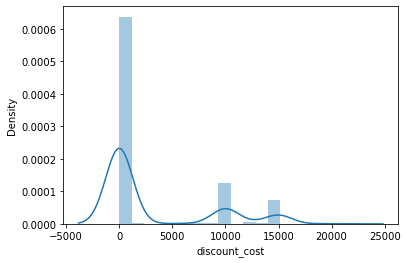

In [19]:
sns.distplot(loyal_customer['discount_cost'])

In [20]:
loyal_customer.to_csv(r'E:\user\snappfood qualiftying\source\data\edited data\loyal_customer.csv')